In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Import our data into pandas from CSV
string_thing = '../Resources/library_usage.csv'
library_usage_df = pd.read_csv(string_thing, low_memory=False)

library_usage_df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
1,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
2,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
3,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0
4,0,ADULT,126,11,45 to 54 years,M2,Marina,January,2016,z,email,True,2003,False,2.0


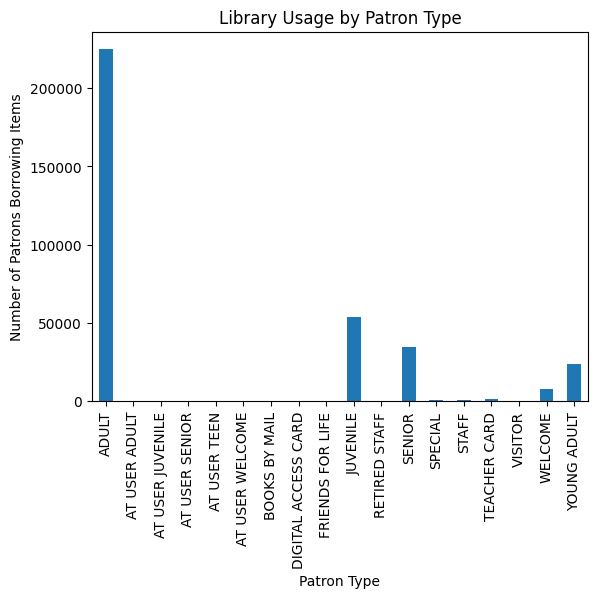

<Figure size 640x480 with 0 Axes>

In [3]:
# Filter data so it only includes patrons who checked out at least one item
library_loans_df = pd.DataFrame(library_usage_df.loc[library_usage_df['Total Checkouts']>0,:])

# Split up our data into groups based upon 'Patron Type Definition'
patron_groups = library_loans_df.groupby('Patron Type Definition')

# Find out how many of each patron type borrowed library items
patron_borrows = patron_groups['Total Checkouts'].count()

# Chart our data, give it a title, and label the axes
patron_chart = patron_borrows.plot(kind="bar", title="Library Usage by Patron Type")
patron_chart.set_xlabel("Patron Type")
patron_chart.set_ylabel("Number of Patrons Borrowing Items")

plt.show()
plt.tight_layout()

In [4]:
# Split up our data into groups based upon 'Home Library Definition' and 'Patron Type Definition'
library_groups = library_usage_df.groupby(['Home Library Definition','Patron Type Definition'])

# Create a new variable that holds the sum of our groups
sum_it_up = library_groups[['Total Checkouts']].sum()
sum_it_up.head(20)

Total Checkouts
Home Library Definition     Patron Type Definition                 
Anza                        ADULT                            855994
                            AT USER ADULT                       131
                            AT USER JUVENILE                     77
                            AT USER TEEN                         45
                            DIGITAL ACCESS CARD                   4
                            FRIENDS FOR LIFE                   1456
                            JUVENILE                         289395
                            RETIRED STAFF                       543
                            SENIOR                           328922
                            STAFF                              9545
                            TEACHER CARD                       4192
                            VISITOR                              17
                            WELCOME                             445
                            YOUNG ADULT                      222294
Bayview/Linda Brooks-Burton ADULT                            269157
                            AT USER ADULT                       217
                            AT USER SENIOR                       42
                            AT USER TEEN                          0
                            AT USER WELCOME                       0
                            DIGITAL ACCESS CARD                  14

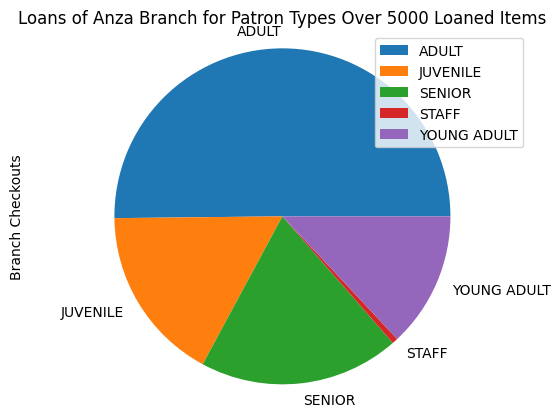

In [5]:
# Make a variable called branch and store a 'Home Library Definition' in it
branch = "Anza"

# Make a variable called min_checkouts that you can change depending on how busy the library branch you've chosen is
min_checkouts = 5000

# Collect the loans of the branch above
just_one_branch = sum_it_up.loc[branch]

# filter the data to patron types with greater than the value set for min_checkouts
just_one_branch = just_one_branch.loc[just_one_branch['Total Checkouts']>min_checkouts,:]

# Create a pie chart based upon the total checkouts (or loans) of that single branch
branch_pie = just_one_branch.plot(kind="pie", y='Total Checkouts', title=("Loans of " + branch + 
                                                                          " Branch for Patron Types Over "
                                                                         + str(min_checkouts) + " Loaned Items"))
branch_pie.set_ylabel("Branch Checkouts")

plt.axis("equal")
plt.show()